# Problem
Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)

# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics import regressionplots 

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

# 2. Import Dataset

In [2]:
car_data = pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')

# 3. Exploratory Data Analysis

## 3.1 Initial Analysis

In [3]:
car_data.head(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0


In [4]:
car_data.tail(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
car_data.shape

(1436, 38)

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [7]:
car_data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3.2 Data Preprocessing

In [8]:
# creating DF using only "Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight" varoables
car_data = pd.concat([car_data.iloc[:,2:4],car_data.iloc[:,6:7],car_data.iloc[:,8:9],car_data.iloc[:,12:14],car_data.iloc[:,15:18]],axis = 1)
car_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [9]:
car_data.tail()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015
1435,6950,76,1,110,1600,5,5,19,1114


In [10]:
car_data.shape

(1436, 9)

In [11]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [12]:
car_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


## 3.3 Assumptions Check

### 3.3.1 Linearity Test

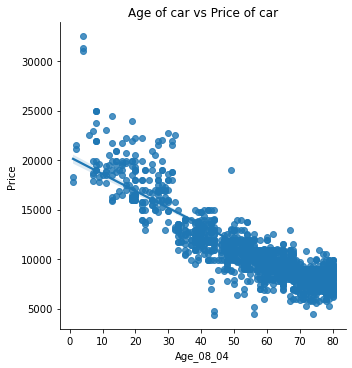

In [13]:
sns.lmplot(x='Age_08_04',y='Price',data=car_data)
plt.title('Age of car vs Price of car')
plt.show()

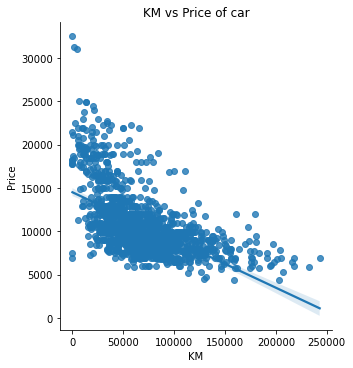

In [14]:
sns.lmplot(x='KM',y='Price',data=car_data)
plt.title('KM vs Price of car')
plt.show()

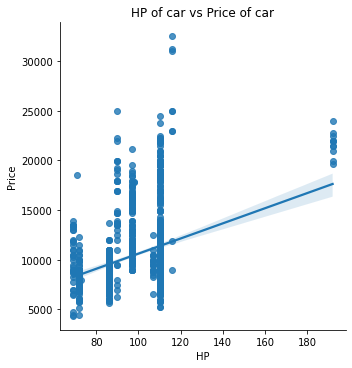

In [15]:
sns.lmplot(x='HP',y='Price',data=car_data)
plt.title('HP of car vs Price of car')
plt.show()

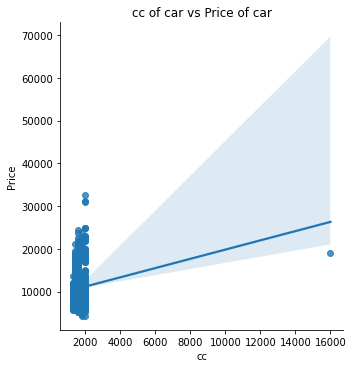

In [16]:
sns.lmplot(x='cc',y='Price',data=car_data)
plt.title('cc of car vs Price of car')
plt.show()

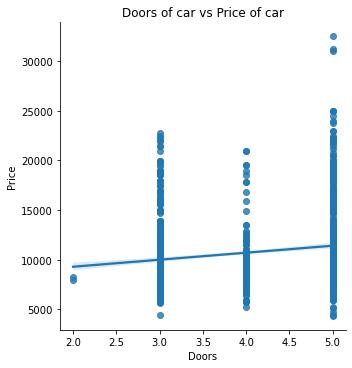

In [17]:
sns.lmplot(x='Doors',y='Price',data=car_data)
plt.title('Doors of car vs Price of car')
plt.show()

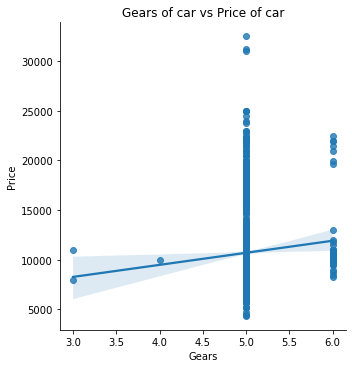

In [18]:
sns.lmplot(x='Gears',y='Price',data=car_data)
plt.title('Gears of car vs Price of car')
plt.show()

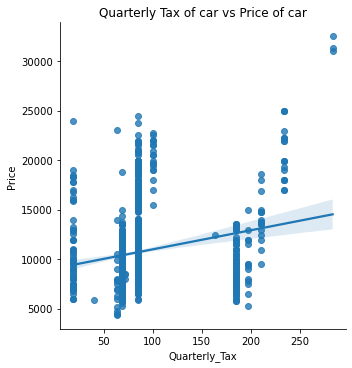

In [19]:
sns.lmplot(x='Quarterly_Tax',y='Price',data=car_data)
plt.title('Quarterly Tax of car vs Price of car')
plt.show()

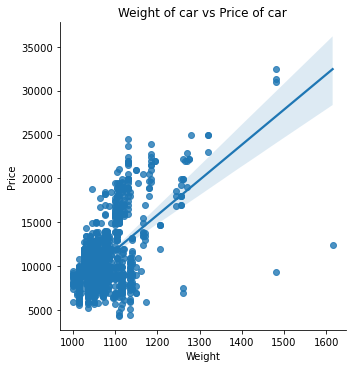

In [20]:
sns.lmplot(x='Weight',y='Price',data=car_data)
plt.title('Weight of car vs Price of car')
plt.show()

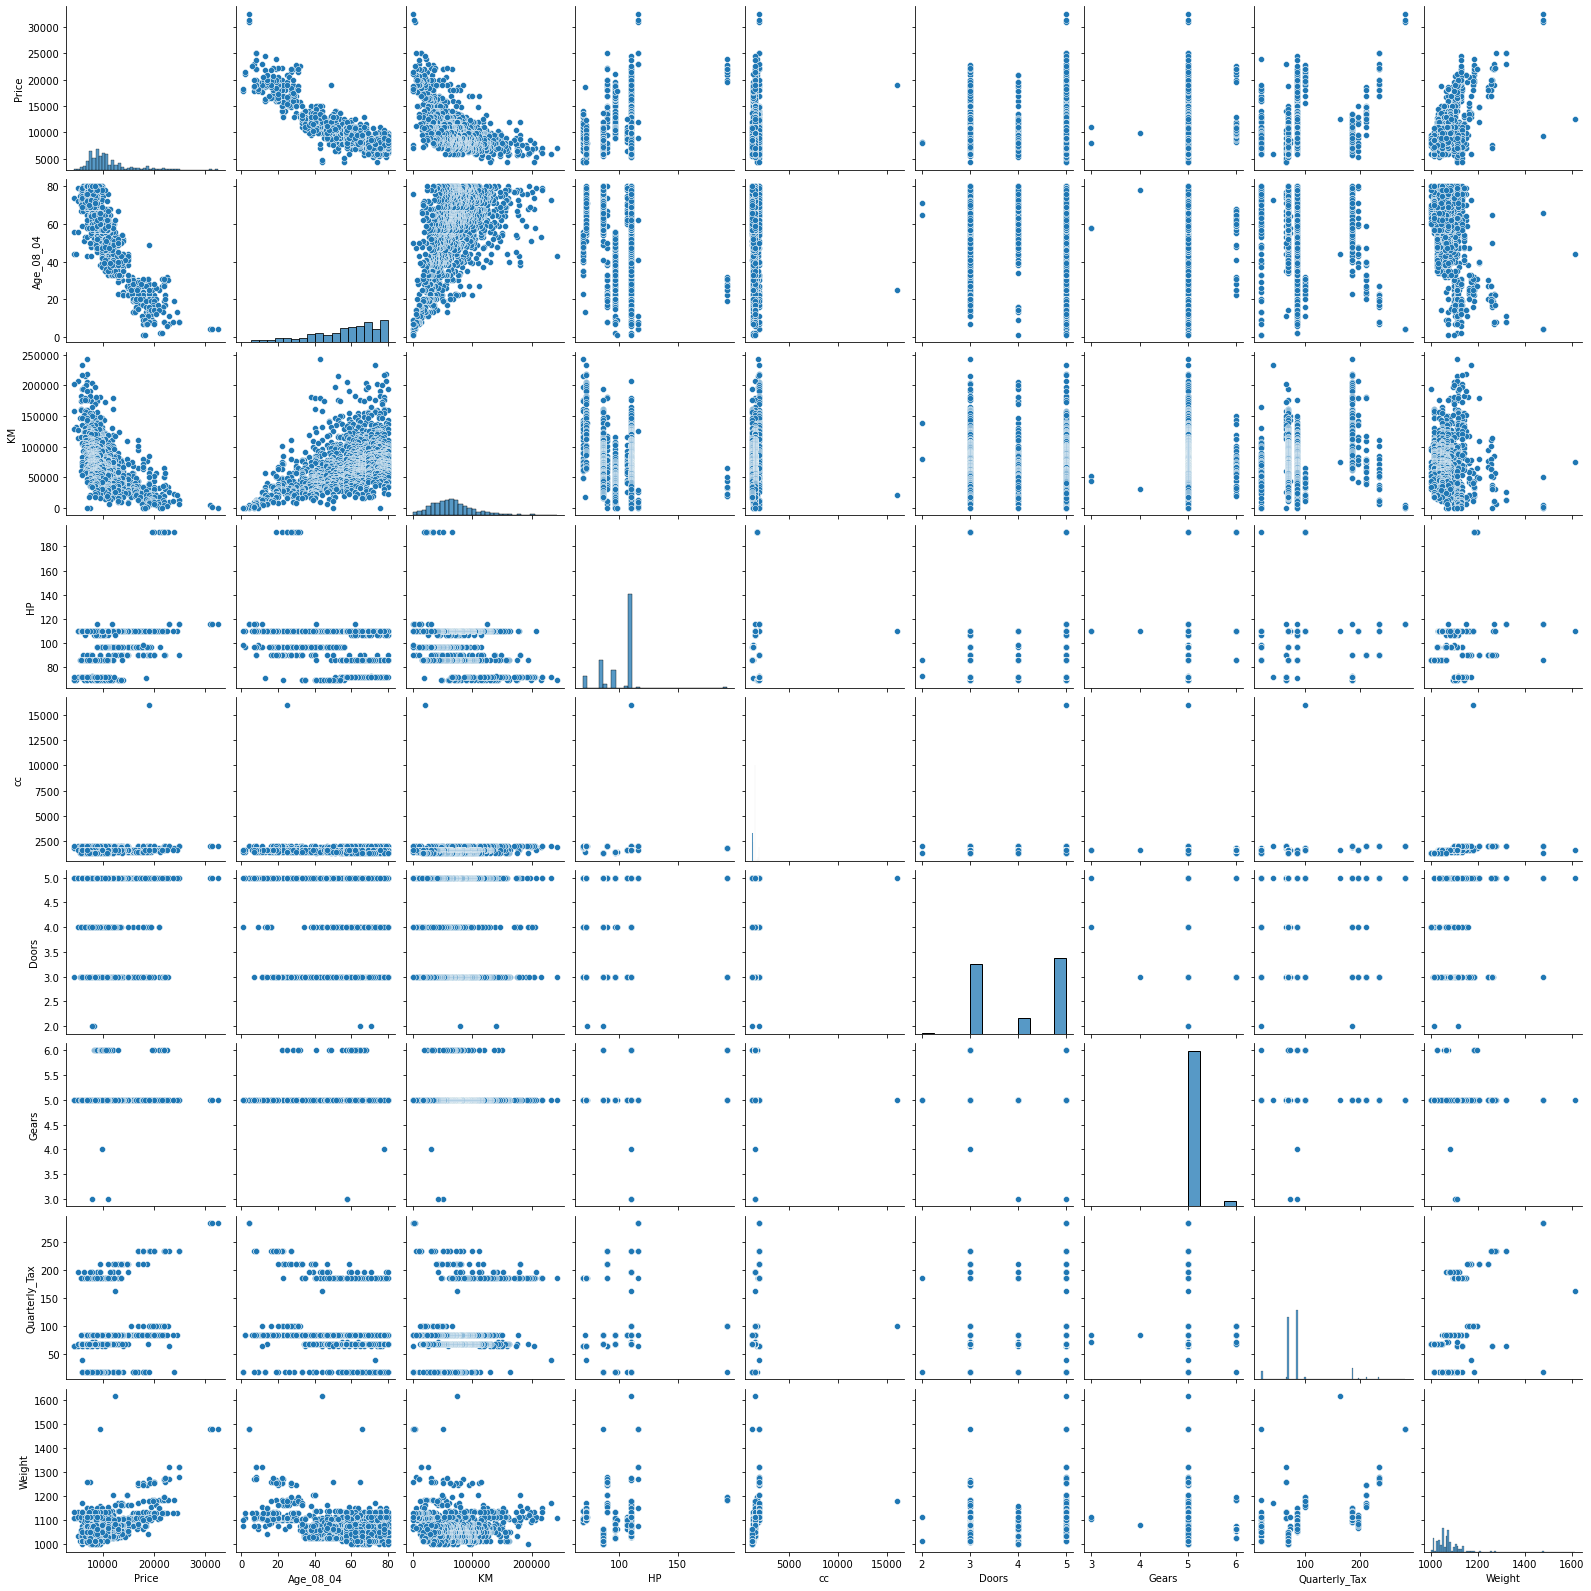

In [21]:
sns.pairplot(car_data)

#### LINEARITY Test failed.

### 3.3.2 Multi-collinearity Test

<AxesSubplot:>

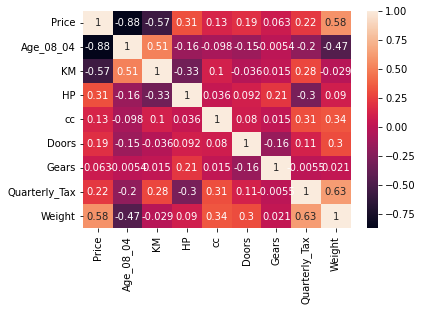

In [22]:
correlation = car_data.corr()
sns.heatmap(correlation, annot=True)

#### No multicollinearity exists.

### Normality Test

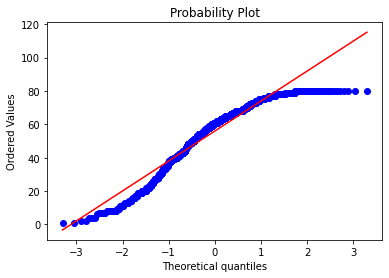

In [23]:
stats.probplot(x=car_data['Age_08_04'],dist='norm',plot=plt)
plt.show()

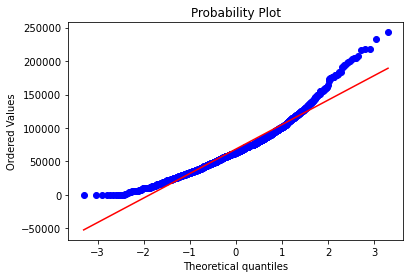

In [24]:
stats.probplot(x=car_data['KM'],dist='norm',plot=plt)
plt.show()

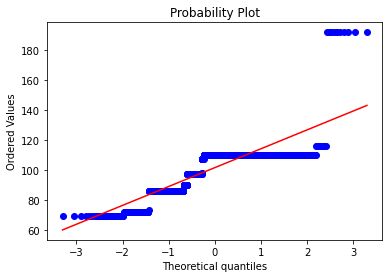

In [25]:
stats.probplot(x=car_data['HP'],dist='norm',plot=plt)
plt.show()

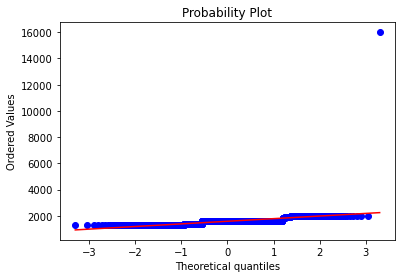

In [26]:
stats.probplot(x=car_data['cc'],dist='norm',plot=plt)
plt.show()

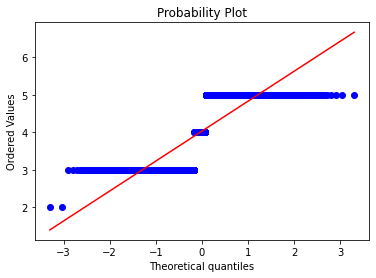

In [27]:
stats.probplot(x=car_data['Doors'],dist='norm',plot=plt)
plt.show()

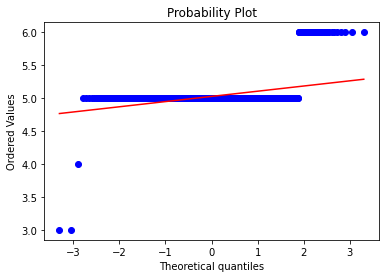

In [28]:
stats.probplot(x=car_data['Gears'],dist='norm',plot=plt)
plt.show()

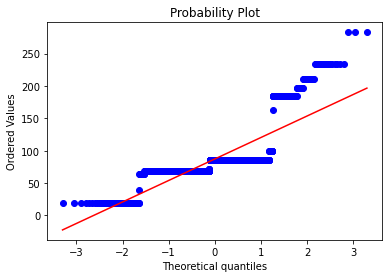

In [29]:
stats.probplot(x=car_data['Quarterly_Tax'],dist='norm',plot=plt)
plt.show()

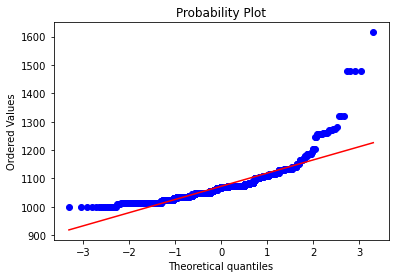

In [30]:
stats.probplot(x=car_data['Weight'],dist='norm',plot=plt)
plt.show()

#### Normality Test also failed.

## checking for outliers.

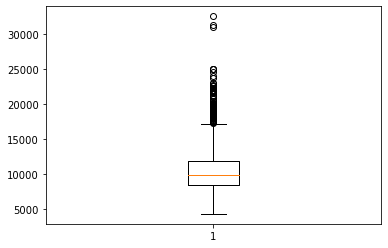

In [31]:
plt.boxplot(car_data['Price'])
plt.show()

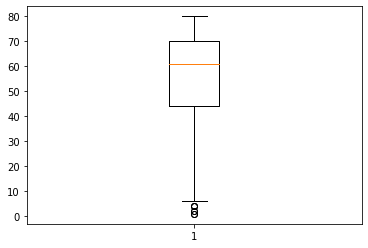

In [32]:
plt.boxplot(car_data['Age_08_04'])
plt.show()

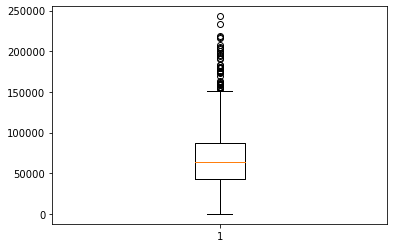

In [33]:
plt.boxplot(car_data['KM'])
plt.show()

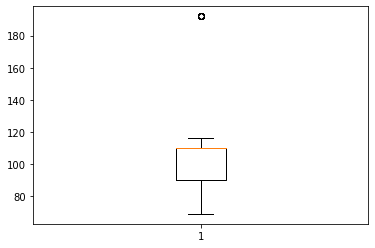

In [34]:
plt.boxplot(car_data['HP'])
plt.show()

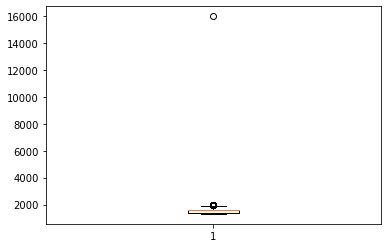

In [35]:
plt.boxplot(car_data['cc'])
plt.show()

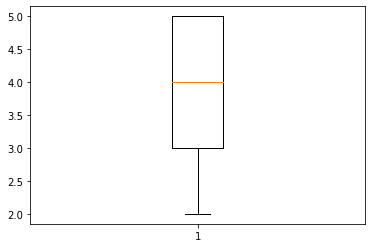

In [36]:
plt.boxplot(car_data['Doors'])
plt.show()

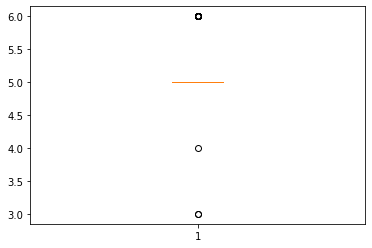

In [37]:
plt.boxplot(car_data['Gears'])
plt.show()

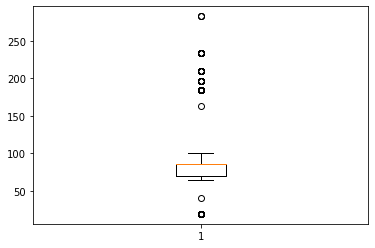

In [38]:
plt.boxplot(car_data['Quarterly_Tax'])
plt.show()

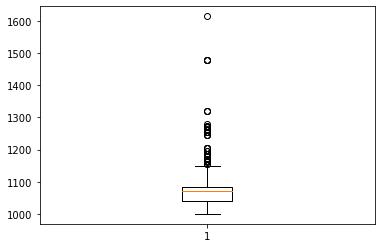

In [39]:
plt.boxplot(car_data['Weight'])
plt.show()

#### outliers are also present.

## Model Building

In [40]:
model = smf.ols(formula='Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=car_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        22:45:27   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Variables cc and Doors are insignificant since pvalue for those variables is > 0.05.

In [41]:
# simple Linear regression model for cc
model1 = smf.ols(formula='Price~cc',data=car_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Tue, 17 May 2022   Prob (F-statistic):           1.55e-06
Time:                        22:46:02   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Variable cc is significant.

In [42]:
# simple Linear regression model for Doors
model2 = smf.ols(formula='Price~Doors',data=car_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 17 May 2022   Prob (F-statistic):           1.46e-12
Time:                        22:46:10   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Doors is also significant.

In [43]:
# model for cc and Doors
model3 = smf.ols(formula='Price~cc+Doors',data=car_data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Tue, 17 May 2022   Prob (F-statistic):           1.15e-15
Time:                        22:46:17   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### both cc and Doors are significant.

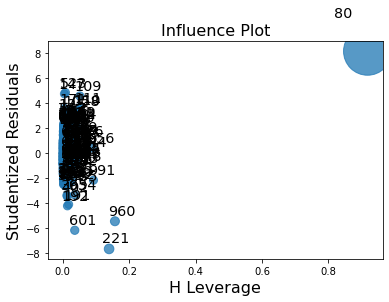

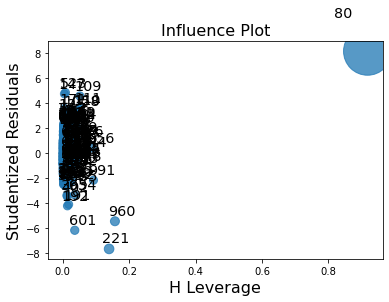

In [44]:
# check for influence points in model.
sm.graphics.influence_plot(model)

In [45]:
# removing 80, where 80 is most influencing index and checking for significance
car_data = car_data.drop(car_data.index[[80]],axis=0)
model4 = smf.ols(formula='Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=car_data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        22:46:40   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Doors is insignificant since they have p value > 0.05

ALso, R-Squared value is improved from 0.864 to 0.869 after removing influence point 80.

In [46]:
# removing 80 and 221, where 221 is next most influencing index
car_data = car_data.drop(car_data.index[[80,221]],axis=0)
model5 = smf.ols(formula='Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=car_data).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1183.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        22:47:05   Log-Likelihood:                -12318.
No. Observations:                1433   AIC:                         2.465e+04
Df Residuals:                    1424   BIC:                         2.470e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6267.6687   1383.144     -4.531      0.000   -8980.888   -3554.450
Age_08_04      -120.4667      2.564    -46.984      0.000    -125.496    -115.437
KM               -0.0178      0.001    -13.933      0.000      -0.020      -0.015
HP               39.3841      2.912     13.525      0.000      33.672      45.096
cc               -2.5259      0.307     -8.220      0.000      -3.129      -1.923
Doors           -27.3616     39.270     -0.697      0.486    -104.394      49.671
Gears           523.5231    192.899      2.714      0.007     145.126     901.921
Quarterly_Tax     9.0571      1.425      6.355      0.000       6.262      11.853
Weight           20.1475      1.116     18.053      0.000      17.958      22.337
==============================================================================
Omnibus:                      245.943   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2694.762
Skew:                          -0.441   Prob(JB):                         0.00
Kurtosis:                       9.660   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Doors is still insignificant.

In [47]:
# removing 80,221 and 960, where 960 is next most influencing index
car_data = car_data.drop(car_data.index[[80,221,960]],axis=0)
model6 = smf.ols(formula='Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=car_data).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1180.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        22:47:17   Log-Likelihood:                -12293.
No. Observations:                1430   AIC:                         2.460e+04
Df Residuals:                    1421   BIC:                         2.465e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6253.1350   1384.250     -4.517      0.000   -8968.528   -3537.742
Age_08_04      -120.5623      2.569    -46.929      0.000    -125.602    -115.523
KM               -0.0178      0.001    -13.914      0.000      -0.020      -0.015
HP               39.3967      2.915     13.517      0.000      33.679      45.114
cc               -2.5287      0.308     -8.221      0.000      -3.132      -1.925
Doors           -25.5290     39.330     -0.649      0.516    -102.681      51.623
Gears           523.6168    193.022      2.713      0.007     144.978     902.255
Quarterly_Tax     9.0606      1.426      6.354      0.000       6.263      11.858
Weight           20.1358      1.117     18.023      0.000      17.944      22.327
==============================================================================
Omnibus:                      245.839   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2679.224
Skew:                          -0.444   Prob(JB):                         0.00
Kurtosis:                       9.647   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Doors is still insignificant.

In [48]:
# removing 80,221, 960 and 601, where 601 is next most influencing index
car_data = car_data.drop(car_data.index[[80,221,960,601]],axis=0)
model7 = smf.ols(formula='Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=car_data).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1172.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        22:47:51   Log-Likelihood:                -12260.
No. Observations:                1426   AIC:                         2.454e+04
Df Residuals:                    1417   BIC:                         2.459e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6187.6737   1387.924     -4.458      0.000   -8910.281   -3465.066
Age_08_04      -120.6698      2.577    -46.818      0.000    -125.726    -115.614
KM               -0.0178      0.001    -13.828      0.000      -0.020      -0.015
HP               39.4229      2.919     13.506      0.000      33.697      45.149
cc               -2.5190      0.308     -8.171      0.000      -3.124      -1.914
Doors           -26.4392     39.407     -0.671      0.502    -103.742      50.864
Gears           522.0534    193.264      2.701      0.007     142.940     901.167
Quarterly_Tax     9.0628      1.428      6.347      0.000       6.262      11.864
Weight           20.0718      1.121     17.902      0.000      17.872      22.271
==============================================================================
Omnibus:                      242.353   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2611.284
Skew:                          -0.437   Prob(JB):                         0.00
Kurtosis:                       9.571   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# This model7 is the best model.  
since, A lower AIC score is better.

## Model evaluation

### Homoscedascity Check

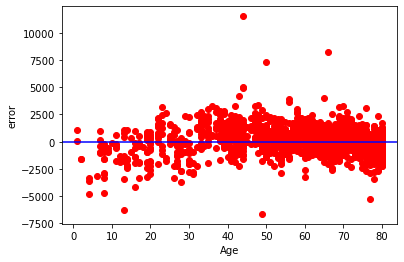

In [74]:
plt.scatter(car_data['Age_08_04'],model7_pred-car_data['Price'],c = 'r')
plt.xlabel('Age')
plt.ylabel('error')
plt.axhline(y=0,color='blue')

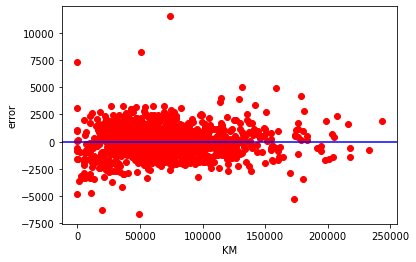

In [75]:
plt.scatter(car_data['KM'],model7_pred-car_data['Price'],c = 'r')
plt.xlabel('KM')
plt.ylabel('error')
plt.axhline(y=0,color='blue')

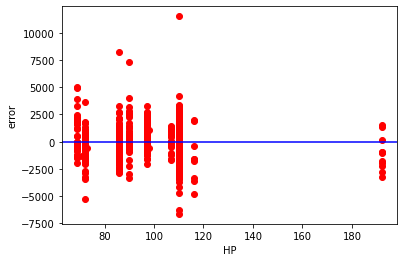

In [76]:
plt.scatter(car_data['HP'],model7_pred-car_data['Price'],c = 'r')
plt.xlabel('HP')
plt.ylabel('error')
plt.axhline(y=0,color='blue')

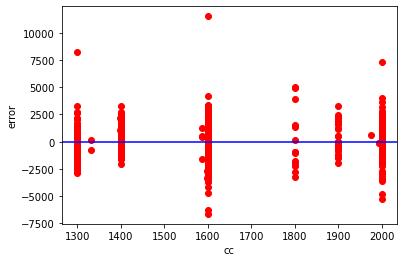

In [77]:
plt.scatter(car_data['cc'],model7_pred-car_data['Price'],c = 'r')
plt.xlabel('cc')
plt.ylabel('error')
plt.axhline(y=0,color='blue')

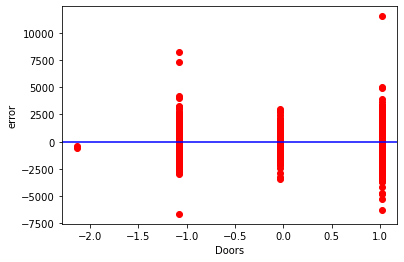

In [78]:
plt.scatter(car_data['Doors'],model7_pred-car_data['Price'],c = 'r')
plt.xlabel('Doors')
plt.ylabel('error')
plt.axhline(y=0,color='blue')

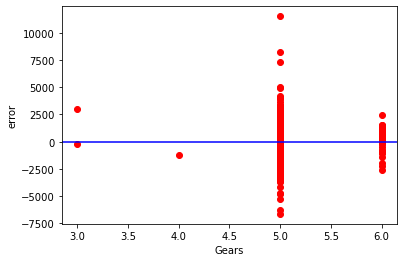

In [79]:
plt.scatter(car_data['Gears'],model7_pred-car_data['Price'],c = 'r')
plt.xlabel('Gears')
plt.ylabel('error')
plt.axhline(y=0,color='blue')

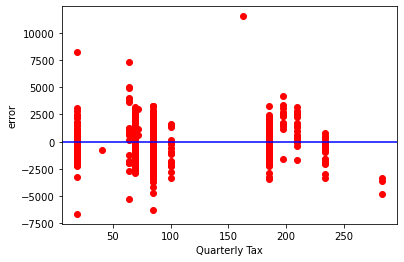

In [80]:
plt.scatter(car_data['Quarterly_Tax'],model7_pred-car_data['Price'],c = 'r')
plt.xlabel('Quarterly Tax')
plt.ylabel('error')
plt.axhline(y=0,color='blue')

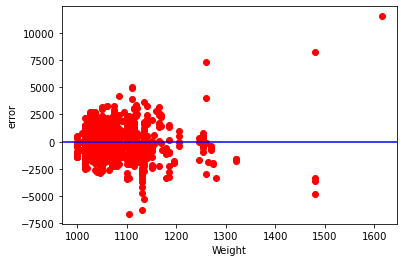

In [81]:
plt.scatter(car_data['Weight'],model7_pred-car_data['Price'],c = 'r')
plt.xlabel('Weight')
plt.ylabel('error')
plt.axhline(y=0,color='blue')

#### Homoscedascity test is not failed for most of the input features.

### Zero Residual Mean Test

In [82]:
# prediction
model7_pred = model7.predict(car_data)

Text(0.5, 1.0, 'Actual Output vs Predicted Output')

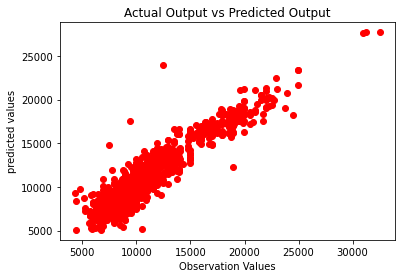

In [83]:
plt.scatter(car_data['Price'],model7_pred,c = 'r')
plt.xlabel('Observation Values')
plt.ylabel('predicted values')
plt.title('Actual Output vs Predicted Output')

### Zero Residual Mean Test is passed.

Text(0, 0.5, 'Residuals')

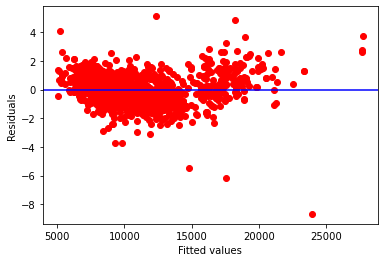

In [60]:
# Residuals v/s Fitted values
# test homoscedasticity by plotting the residuals and checking if the variance is uniform.
plt.scatter(model7_pred, model7.resid_pearson,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
## errors are kind off homoscadasticity i.e there is equal variance

(array([  1.,   1.,   1.,   2.,  32., 421., 776., 175.,  14.,   3.]),
 array([-8.67787095, -7.29741125, -5.91695155, -4.53649185, -3.15603215,
        -1.77557245, -0.39511275,  0.98534695,  2.36580665,  3.74626635,
         5.12672605]),
 <BarContainer object of 10 artists>)

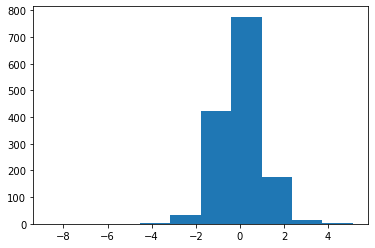

In [63]:
#Normality
## histogram--- for checking if the errors are normally distributed or not.
plt.hist(model7.resid_pearson) 

((array([-3.29853151, -3.04084612, -2.89751568, ...,  2.89751568,
          3.04084612,  3.29853151]),
  array([-8.67787095, -6.14432029, -5.46731346, ...,  4.11507593,
          4.84796055,  5.12672605])),
 (0.973617801985665, -1.1271483237266483e-12, 0.974717877783372))

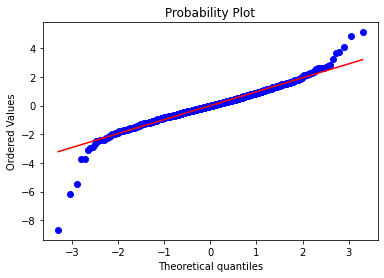

In [64]:
stats.probplot(model7.resid_pearson, dist='norm',plot=plt)
## Errors are normally distributed

#### The errors are normally distributed as all the points are lying exactly on the line except just few points.

## Model Building using sklearn

In [66]:
car_data2 = car_data

In [67]:
car_data2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,-1.081545,5,210,1165
1,13750,23,72937,90,2000,-1.081545,5,210,1165
2,13950,24,41711,90,2000,-1.081545,5,210,1165
3,14950,26,48000,90,2000,-1.081545,5,210,1165
4,13750,30,38500,90,2000,-1.081545,5,210,1170


In [68]:
X = car_data2.drop('Price',axis = 1).values
y = car_data2.iloc[:,0].values.reshape(-1,1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape

((1069, 8), (357, 8))

In [70]:
lr = LinearRegression()
model10 = lr.fit(X_train,y_train)
y_predict = model10.predict(X_test)

In [71]:
print('Mean Absolute Error    :', round((mean_absolute_error(y_test, y_predict)),4))  
print('Mean Squared Error     :', round((mean_squared_error(y_test, y_predict)),4))   
print('Root Mean Squared Error:', round(( np.sqrt(mean_squared_error(y_test, y_predict))),4)) 
print("R^2 Score              :", round(( r2_score(y_test, y_predict)),4)) 

Mean Absolute Error    : 1004.9067
Mean Squared Error     : 1689396.2108
Root Mean Squared Error: 1299.7678
R^2 Score              : 0.859


# CONCLUSION
model7 is the best model among all of the above models.